# SUMMARY:

This code runs Monte Carlo simulations for (A.) a number of ETFs by themselves, and (B.) the same ETFs paired with Bitcoin in 50/50 weighted portfolios. 
Note: The ETF simulations by themselves are to serve as a baseline for comparison when the same ETF is combined with Bitcoin. 

The historical data used is 2022 year-to-date (May 10th at the time of writing) projecting 9 weeks in advance.

In [1]:
import pandas as pd
from pathlib import Path
import pandas_datareader.data as reader
import datetime as dt
from MCForecastTools import MCSimulation

# For visualizations:
import seaborn as sns

In [2]:
# Get ticker data

def tickerprices_df(ticker1, start, end):
    ticker_prices = reader.get_data_yahoo(ticker1, start, end)
    display(ticker_prices.head())
    display(ticker_prices.tail())
    return(ticker_prices)

In [3]:
# Arrange columns for MC simulation

def set_columns(ticker_prices):
    ticker_prices.columns = ["adj close", "close", "high", "low", "open", "volume"] #rename columns
    ticker_prices.drop(columns="adj close", axis=1, inplace=True) #drop 'adj close' column
    display(ticker_prices.head())
    return(ticker_prices)

In [4]:
# Concat and format for single ticker MC simulation (100% weight)

def ticker_only_prices(ticker_prices, ticker):
    ticker_only_prices = pd.concat([ticker_prices], axis=1, keys=[ticker])
    display(ticker_only_prices.head())
    return(ticker_only_prices)

In [5]:
# Concat and format for double ticker MC simulation (50%/50% weights)

def concat(df1_prices, df2_prices, first_ticker, sec_ticker):
    prices_combo = pd.concat([df1_prices, df2_prices], axis=1, keys=[first_ticker, sec_ticker])
    prices_combo = prices_combo.dropna()
    display(prices_combo.tail())
    return prices_combo

In [6]:
# Formulate Monte Carlo simulation object for 100% weighted portfolio 

def MC_single_sim(ticker_only):
    MC_ticker = MCSimulation(
        portfolio_data = ticker_only,
        weights = [1],
        num_simulation = 1000,
        num_trading_days = 46) # 46 trading days, ~9 weeks in advance
    display(MC_ticker.portfolio_data.head()) # Review the simulation input data
    return MC_ticker

In [7]:
# Formulate Monte Carlo simulation object for 50/50 weighted portfolio

def MC_combo_sim(combo_df):
    MC_combo = MCSimulation(
        portfolio_data = combo_df,
        weights = [.5, .5],
        num_simulation = 1000,
        num_trading_days = 46)  # 46 trading days, ~9 weeks in advance
    display(MC_combo.portfolio_data.head()) # Review the simulation input data
    return MC_combo

In [8]:
# Generate cumulative returns summary tables and print
       
def summary_tables(MC_dict):
    tables = []
    for ticker, MC_obj in MC_dict.items():
        print(f"Cummulative returns summary for {ticker}:")            
        ticker_table = MC_obj.summarize_cumulative_return()
        print(ticker_table)
        tables.append(ticker_table)  
    return(tables)

In [11]:
# Summarize expected returns for single asset portfolio

def summary1(table, investment, ticker):
    
    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current portfolio
    ci_lower_cumulative_return = round(table[8] * investment, 2)
    ci_upper_cumulative_return = round(table[9] * investment, 2)

    # Print the result of calculations
    print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio with 100% {ticker} over the next"
          f"\nnine weeks will end within the range of ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

    mean = round(table[1] * investment, 2)
    print(f"\nThe average expected return for {ticker} in nine weeks is ${mean}.\n-----")

In [12]:
# Summarize returns for 50/50 weighted portfolio

def summary2(table, investment, tickerA, tickerB):
    
    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current portfolio
    ci_lower_cumulative_return = round(table[8] * investment, 2)
    ci_upper_cumulative_return = round(table[9] * investment, 2)

    # Print the result of calculations
    print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio with 50% {tickerA} and 50% {tickerB}"
          f"\nover the next nine weeks will end within the range of ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

    mean = round(table[1] * investment, 2)
    print(f"\nThe average expected return for {tickerA} with {tickerB} in nine weeks is ${mean}.\n-----")

# PART I: DATA CAPTURE AND ORGANIZATION

In [13]:
# Set start and end dates. Establish ticker symbols.

end = dt.date(2022, 5, 10)
start = dt.date(2022, 1, 3)

ticker1 = ["BTC-USD"]
ticker2 = ["VOT"]  #Vanguard Mid-Cap Growth ETF ETF, a midcap growth fund. Chose midcap to factor out size.
ticker3 = ["IWS"]  #iShares Russell Mid-Cap VALUE ETF, a midcap value fund. Chose midcap to factor out size.
ticker4 = ["MGC"]   #Vanguard Mega Cap ETF, a fund with LARGE CAPS only to feature size (large cap end of the spectrum).
ticker5 = ["EWSC"]  #Invesco S&P SmallCap 600 Equal Weight ETF     

In [14]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

btc_prices = tickerprices_df(ticker1, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2022-01-03,46458.117188,46458.117188,47510.726562,45835.964844,47343.542969,33071628362
2022-01-04,45897.574219,45897.574219,47406.546875,45752.464844,46458.851562,42494677905
2022-01-05,43569.003906,43569.003906,46929.046875,42798.222656,45899.359375,36851084859
2022-01-06,43160.929688,43160.929688,43748.718750,42645.539062,43565.511719,30208048289
2022-01-07,41557.902344,41557.902344,43153.570312,41077.445312,43153.570312,84196607520


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2022-05-07,35501.953125,35501.953125,36129.925781,34940.824219,36042.503906,24375896406
2022-05-08,34059.265625,34059.265625,35502.941406,33878.964844,35502.941406,36763041910
2022-05-09,30296.953125,30296.953125,34222.074219,30296.953125,34060.015625,63355494961
2022-05-10,31022.906250,31022.906250,32596.308594,29944.802734,30273.654297,59811038817
2022-05-11,28936.355469,28936.355469,32013.402344,28170.414062,31016.183594,70388855818


In [15]:
#Format columns for Monte Carlo compatibility

btc_prices = set_columns(btc_prices)

,close,high,low,open,volume
Date,,,,,
2022-01-03,46458.117188,47510.726562,45835.964844,47343.542969,33071628362
2022-01-04,45897.574219,47406.546875,45752.464844,46458.851562,42494677905
2022-01-05,43569.003906,46929.046875,42798.222656,45899.359375,36851084859
2022-01-06,43160.929688,43748.718750,42645.539062,43565.511719,30208048289
2022-01-07,41557.902344,43153.570312,41077.445312,43153.570312,84196607520


In [16]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

btc_only_prices = ticker_only_prices(btc_prices, "BTC-USD")

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-01-03  46458.117188  47510.726562  45835.964844  47343.542969   
2022-01-04  45897.574219  47406.546875  45752.464844  46458.851562   
2022-01-05  43569.003906  46929.046875  42798.222656  45899.359375   
2022-01-06  43160.929688  43748.718750  42645.539062  43565.511719   
2022-01-07  41557.902344  43153.570312  41077.445312  43153.570312   

                         
                 volume  
Date                     
2022-01-03  33071628362  
2022-01-04  42494677905  
2022-01-05  36851084859  
2022-01-06  30208048289  
2022-01-07  84196607520

In [17]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

vot_prices = tickerprices_df(ticker2, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,VOT,VOT,VOT,VOT,VOT,VOT
Date,,,,,,
2022-01-03,251.020813,251.369995,255.300003,250.000000,255.300003,242500.0
2022-01-04,247.465775,247.809998,252.229996,245.259995,252.229996,293900.0
2022-01-05,238.068832,238.399994,247.190002,238.399994,247.190002,373700.0
2022-01-06,238.588120,238.919998,241.250000,235.419998,238.419998,223100.0
2022-01-07,235.013092,235.339996,240.589996,235.259995,238.899994,203800.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,VOT,VOT,VOT,VOT,VOT,VOT
Date,,,,,,
2022-05-04,204.710007,204.710007,205.050003,195.229996,199.559998,304300.0
2022-05-05,195.710007,195.710007,202.830002,193.539993,202.539993,290100.0
2022-05-06,190.869995,190.869995,194.130005,187.929993,194.130005,493200.0
2022-05-09,180.419998,180.419998,188.119995,179.500000,187.350006,479500.0
2022-05-10,181.250000,181.250000,185.380005,177.000000,184.350006,538400.0


In [18]:
#Format columns for Monte Carlo compatibility

vot_prices = set_columns(vot_prices)

,close,high,low,open,volume
Date,,,,,
2022-01-03,251.369995,255.300003,250.000000,255.300003,242500.0
2022-01-04,247.809998,252.229996,245.259995,252.229996,293900.0
2022-01-05,238.399994,247.190002,238.399994,247.190002,373700.0
2022-01-06,238.919998,241.250000,235.419998,238.419998,223100.0
2022-01-07,235.339996,240.589996,235.259995,238.899994,203800.0


In [19]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

vot_only_prices = ticker_only_prices(vot_prices, "VOT")

VOT                                              
                 close        high         low        open    volume
Date                                                                
2022-01-03  251.369995  255.300003  250.000000  255.300003  242500.0
2022-01-04  247.809998  252.229996  245.259995  252.229996  293900.0
2022-01-05  238.399994  247.190002  238.399994  247.190002  373700.0
2022-01-06  238.919998  241.250000  235.419998  238.419998  223100.0
2022-01-07  235.339996  240.589996  235.259995  238.899994  203800.0

In [20]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

iws_prices = tickerprices_df(ticker3, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWS,IWS,IWS,IWS,IWS,IWS
Date,,,,,,
2022-01-03,121.871330,122.339996,122.919998,121.589996,122.500000,1215800.0
2022-01-04,123.116539,123.589996,123.959999,122.989998,122.989998,537700.0
2022-01-05,121.203896,121.669998,124.279999,121.629997,123.809998,581800.0
2022-01-06,121.741829,122.209999,122.910004,121.459999,122.129997,490400.0
2022-01-07,121.692024,122.160004,122.769997,121.860001,122.320000,455300.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWS,IWS,IWS,IWS,IWS,IWS
Date,,,,,,
2022-05-04,116.970001,116.970001,117.099998,113.209999,114.190002,981300.0
2022-05-05,113.519997,113.519997,116.279999,112.519997,116.000000,527400.0
2022-05-06,112.620003,112.620003,113.370003,111.099998,113.040001,1243800.0
2022-05-09,109.000000,109.000000,111.519997,108.639999,111.320000,907000.0
2022-05-10,108.709999,108.709999,110.610001,107.160004,110.309998,934800.0


In [21]:
#Format columns for Monte Carlo compatibility

iws_prices = set_columns(iws_prices)

,close,high,low,open,volume
Date,,,,,
2022-01-03,122.339996,122.919998,121.589996,122.500000,1215800.0
2022-01-04,123.589996,123.959999,122.989998,122.989998,537700.0
2022-01-05,121.669998,124.279999,121.629997,123.809998,581800.0
2022-01-06,122.209999,122.910004,121.459999,122.129997,490400.0
2022-01-07,122.160004,122.769997,121.860001,122.320000,455300.0


In [22]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

iws_only_prices = ticker_only_prices(iws_prices, "IWS")

IWS                                               
                 close        high         low        open     volume
Date                                                                 
2022-01-03  122.339996  122.919998  121.589996  122.500000  1215800.0
2022-01-04  123.589996  123.959999  122.989998  122.989998   537700.0
2022-01-05  121.669998  124.279999  121.629997  123.809998   581800.0
2022-01-06  122.209999  122.910004  121.459999  122.129997   490400.0
2022-01-07  122.160004  122.769997  121.860001  122.320000   455300.0

In [23]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

mgc_prices = tickerprices_df(ticker4, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MGC,MGC,MGC,MGC,MGC,MGC
Date,,,,,,
2022-01-03,168.836395,169.350006,169.380005,167.809998,168.669998,110700.0
2022-01-04,168.477493,168.990005,170.000000,168.300003,169.899994,79000.0
2022-01-05,165.157593,165.660004,169.020004,165.610001,168.699997,167600.0
2022-01-06,164.798676,165.300003,166.309998,164.389999,165.210007,140400.0
2022-01-07,164.240387,164.740005,165.669998,164.100006,165.369995,71100.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MGC,MGC,MGC,MGC,MGC,MGC
Date,,,,,,
2022-05-04,149.990005,149.990005,150.270004,144.600006,145.919998,346500.0
2022-05-05,144.419998,144.419998,148.429993,143.000000,148.360001,243100.0
2022-05-06,143.690002,143.690002,144.910004,141.610001,143.600006,237200.0
2022-05-09,138.960007,138.960007,141.669998,138.369995,141.369995,285400.0
2022-05-10,139.339996,139.339996,141.699997,137.990005,141.240005,313200.0


In [24]:
#Format columns for Monte Carlo compatibility

mgc_prices = set_columns(mgc_prices)

,close,high,low,open,volume
Date,,,,,
2022-01-03,169.350006,169.380005,167.809998,168.669998,110700.0
2022-01-04,168.990005,170.000000,168.300003,169.899994,79000.0
2022-01-05,165.660004,169.020004,165.610001,168.699997,167600.0
2022-01-06,165.300003,166.309998,164.389999,165.210007,140400.0
2022-01-07,164.740005,165.669998,164.100006,165.369995,71100.0


In [25]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

mgc_only_prices = ticker_only_prices(mgc_prices, "MGC")

MGC                                              
                 close        high         low        open    volume
Date                                                                
2022-01-03  169.350006  169.380005  167.809998  168.669998  110700.0
2022-01-04  168.990005  170.000000  168.300003  169.899994   79000.0
2022-01-05  165.660004  169.020004  165.610001  168.699997  167600.0
2022-01-06  165.300003  166.309998  164.389999  165.210007  140400.0
2022-01-07  164.740005  165.669998  164.100006  165.369995   71100.0

In [26]:
# Get ticker info from Yahoo Finance with tickerprices_df function 

ewsc_prices = tickerprices_df(ticker5, start, end)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,EWSC,EWSC,EWSC,EWSC,EWSC,EWSC
Date,,,,,,
2022-01-03,85.430771,85.680000,86.400002,85.139999,85.540001,196200.0
2022-01-04,85.979172,86.230003,86.820000,85.860001,86.330002,78600.0
2022-01-05,84.084702,84.330002,87.669998,84.330002,86.459999,13300.0
2022-01-06,84.623131,84.870003,85.959999,84.580002,84.860001,19800.0
2022-01-07,83.775597,84.019997,85.680000,84.019997,85.680000,15700.0


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,EWSC,EWSC,EWSC,EWSC,EWSC,EWSC
Date,,,,,,
2022-05-04,76.610001,76.610001,76.809998,74.220001,74.220001,900.0
2022-05-05,73.849998,73.849998,75.980003,73.599998,75.980003,2500.0
2022-05-06,72.940002,72.940002,73.379997,72.680000,73.379997,1100.0
2022-05-09,70.949997,70.949997,71.910004,70.629997,71.910004,4200.0
2022-05-10,70.480003,70.480003,71.570000,69.599998,71.570000,5700.0


In [27]:
#Format columns for Monte Carlo compatibility

ewsc_prices = set_columns(ewsc_prices)

,close,high,low,open,volume
Date,,,,,
2022-01-03,85.680000,86.400002,85.139999,85.540001,196200.0
2022-01-04,86.230003,86.820000,85.860001,86.330002,78600.0
2022-01-05,84.330002,87.669998,84.330002,86.459999,13300.0
2022-01-06,84.870003,85.959999,84.580002,84.860001,19800.0
2022-01-07,84.019997,85.680000,84.019997,85.680000,15700.0


In [28]:
#Get a dataframe for ticker that will only be used by istelf for a 100% ticker-weighted Monte Carlo

ewsc_only_prices = ticker_only_prices(ewsc_prices, "EWSC")

EWSC                                           
                close       high        low       open    volume
Date                                                            
2022-01-03  85.680000  86.400002  85.139999  85.540001  196200.0
2022-01-04  86.230003  86.820000  85.860001  86.330002   78600.0
2022-01-05  84.330002  87.669998  84.330002  86.459999   13300.0
2022-01-06  84.870003  85.959999  84.580002  84.860001   19800.0
2022-01-07  84.019997  85.680000  84.019997  85.680000   15700.0

In [29]:
# Concatenate the ticker DataFrames

prices_btc_vot = concat(btc_prices, vot_prices, "BTC-USD", "VOT")
prices_btc_iws = concat(btc_prices, iws_prices, "BTC-USD", "IWS")
prices_btc_mgc = concat(btc_prices, mgc_prices, "BTC-USD", "MGC")
prices_btc_ewsc = concat(btc_prices, ewsc_prices, "BTC-USD", "EWSC")

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-05-04  39698.371094  39902.949219  37732.058594  37748.011719   
2022-05-05  36575.140625  39789.281250  35856.515625  39695.746094   
2022-05-06  36040.921875  36624.359375  35482.132812  36573.183594   
2022-05-09  30296.953125  34222.074219  30296.953125  34060.015625   
2022-05-10  31022.906250  32596.308594  29944.802734  30273.654297   

                                VOT                                      \
                 volume       close        high         low        open   
Date                                                                      
2022-05-04  36754404490  204.710007  205.050003  195.229996  199.559998   
2022-05-05  43106256317  195.710007  202.830002  193.539993  202.539993   
2022-05-06  37795577489  190.869995  194.130005  187.929993  194.130005   
2022-05-09  63355494961  180.419998  188.119995  179.500000  187.350006   
2022-05-10  59811038817  181.250000  185.380005  177.000000  184.350006   

                      
              volume  
Date                  
2022-05-04  304300.0  
2022-05-05  290100.0  
2022-05-06  493200.0  
2022-05-09  479500.0  
2022-05-10  538400.0

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-05-04  39698.371094  39902.949219  37732.058594  37748.011719   
2022-05-05  36575.140625  39789.281250  35856.515625  39695.746094   
2022-05-06  36040.921875  36624.359375  35482.132812  36573.183594   
2022-05-09  30296.953125  34222.074219  30296.953125  34060.015625   
2022-05-10  31022.906250  32596.308594  29944.802734  30273.654297   

                                IWS                                      \
                 volume       close        high         low        open   
Date                                                                      
2022-05-04  36754404490  116.970001  117.099998  113.209999  114.190002   
2022-05-05  43106256317  113.519997  116.279999  112.519997  116.000000   
2022-05-06  37795577489  112.620003  113.370003  111.099998  113.040001   
2022-05-09  63355494961  109.000000  111.519997  108.639999  111.320000   
2022-05-10  59811038817  108.709999  110.610001  107.160004  110.309998   

                       
               volume  
Date                   
2022-05-04   981300.0  
2022-05-05   527400.0  
2022-05-06  1243800.0  
2022-05-09   907000.0  
2022-05-10   934800.0

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-05-04  39698.371094  39902.949219  37732.058594  37748.011719   
2022-05-05  36575.140625  39789.281250  35856.515625  39695.746094   
2022-05-06  36040.921875  36624.359375  35482.132812  36573.183594   
2022-05-09  30296.953125  34222.074219  30296.953125  34060.015625   
2022-05-10  31022.906250  32596.308594  29944.802734  30273.654297   

                                MGC                                      \
                 volume       close        high         low        open   
Date                                                                      
2022-05-04  36754404490  149.990005  150.270004  144.600006  145.919998   
2022-05-05  43106256317  144.419998  148.429993  143.000000  148.360001   
2022-05-06  37795577489  143.690002  144.910004  141.610001  143.600006   
2022-05-09  63355494961  138.960007  141.669998  138.369995  141.369995   
2022-05-10  59811038817  139.339996  141.699997  137.990005  141.240005   

                      
              volume  
Date                  
2022-05-04  346500.0  
2022-05-05  243100.0  
2022-05-06  237200.0  
2022-05-09  285400.0  
2022-05-10  313200.0

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-05-04  39698.371094  39902.949219  37732.058594  37748.011719   
2022-05-05  36575.140625  39789.281250  35856.515625  39695.746094   
2022-05-06  36040.921875  36624.359375  35482.132812  36573.183594   
2022-05-09  30296.953125  34222.074219  30296.953125  34060.015625   
2022-05-10  31022.906250  32596.308594  29944.802734  30273.654297   

                              EWSC                                           
                 volume      close       high        low       open  volume  
Date                                                                         
2022-05-04  36754404490  76.610001  76.809998  74.220001  74.220001   900.0  
2022-05-05  43106256317  73.849998  75.980003  73.599998  75.980003  2500.0  
2022-05-06  37795577489  72.940002  73.379997  72.680000  73.379997  1100.0  
2022-05-09  63355494961  70.949997  71.910004  70.629997  71.910004  4200.0  
2022-05-10  59811038817  70.480003  71.570000  69.599998  71.570000  5700.0

# PART II: MONTE CARLOS 

In [30]:
# Get MC simulation object 

MC_vot = MC_single_sim(vot_only_prices)

VOT                                                \
                 close        high         low        open    volume   
Date                                                                   
2022-01-03  251.369995  255.300003  250.000000  255.300003  242500.0   
2022-01-04  247.809998  252.229996  245.259995  252.229996  293900.0   
2022-01-05  238.399994  247.190002  238.399994  247.190002  373700.0   
2022-01-06  238.919998  241.250000  235.419998  238.419998  223100.0   
2022-01-07  235.339996  240.589996  235.259995  238.899994  203800.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04    -0.014162  
2022-01-05    -0.037973  
2022-01-06     0.002181  
2022-01-07    -0.014984

In [31]:
# Get MC simulation object 

MC_iws = MC_single_sim(iws_only_prices)

IWS                                                 \
                 close        high         low        open     volume   
Date                                                                    
2022-01-03  122.339996  122.919998  121.589996  122.500000  1215800.0   
2022-01-04  123.589996  123.959999  122.989998  122.989998   537700.0   
2022-01-05  121.669998  124.279999  121.629997  123.809998   581800.0   
2022-01-06  122.209999  122.910004  121.459999  122.129997   490400.0   
2022-01-07  122.160004  122.769997  121.860001  122.320000   455300.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04     0.010217  
2022-01-05    -0.015535  
2022-01-06     0.004438  
2022-01-07    -0.000409

In [32]:
# Get MC simulation object 

MC_mgc = MC_single_sim(mgc_only_prices)

MGC                                                \
                 close        high         low        open    volume   
Date                                                                   
2022-01-03  169.350006  169.380005  167.809998  168.669998  110700.0   
2022-01-04  168.990005  170.000000  168.300003  169.899994   79000.0   
2022-01-05  165.660004  169.020004  165.610001  168.699997  167600.0   
2022-01-06  165.300003  166.309998  164.389999  165.210007  140400.0   
2022-01-07  164.740005  165.669998  164.100006  165.369995   71100.0   

                         
           daily_return  
Date                     
2022-01-03          NaN  
2022-01-04    -0.002126  
2022-01-05    -0.019705  
2022-01-06    -0.002173  
2022-01-07    -0.003388

In [33]:
# Get MC simulation object 

MC_ewsc = MC_single_sim(ewsc_only_prices)

EWSC                                                        
                close       high        low       open    volume daily_return
Date                                                                         
2022-01-03  85.680000  86.400002  85.139999  85.540001  196200.0          NaN
2022-01-04  86.230003  86.820000  85.860001  86.330002   78600.0     0.006419
2022-01-05  84.330002  87.669998  84.330002  86.459999   13300.0    -0.022034
2022-01-06  84.870003  85.959999  84.580002  84.860001   19800.0     0.006403
2022-01-07  84.019997  85.680000  84.019997  85.680000   15700.0    -0.010015

In [34]:
# Get MC simulation object for BTC and VOT

MC_btc_vot = MC_combo_sim(prices_btc_vot)

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-01-03  46458.117188  47510.726562  45835.964844  47343.542969   
2022-01-04  45897.574219  47406.546875  45752.464844  46458.851562   
2022-01-05  43569.003906  46929.046875  42798.222656  45899.359375   
2022-01-06  43160.929688  43748.718750  42645.539062  43565.511719   
2022-01-07  41557.902344  43153.570312  41077.445312  43153.570312   

                                             VOT                          \
                 volume daily_return       close        high         low   
Date                                                                       
2022-01-03  33071628362          NaN  251.369995  255.300003  250.000000   
2022-01-04  42494677905    -0.012066  247.809998  252.229996  245.259995   
2022-01-05  36851084859    -0.050734  238.399994  247.190002  238.399994   
2022-01-06  30208048289    -0.009366  238.919998  241.250000  235.419998   
2022-01-07  84196607520    -0.037141  235.339996  240.589996  235.259995   

                                               
                  open    volume daily_return  
Date                                           
2022-01-03  255.300003  242500.0          NaN  
2022-01-04  252.229996  293900.0    -0.014162  
2022-01-05  247.190002  373700.0    -0.037973  
2022-01-06  238.419998  223100.0     0.002181  
2022-01-07  238.899994  203800.0    -0.014984

In [35]:
# Get MC simulation object for IWS and BTC

MC_btc_iws = MC_combo_sim(prices_btc_iws)

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-01-03  46458.117188  47510.726562  45835.964844  47343.542969   
2022-01-04  45897.574219  47406.546875  45752.464844  46458.851562   
2022-01-05  43569.003906  46929.046875  42798.222656  45899.359375   
2022-01-06  43160.929688  43748.718750  42645.539062  43565.511719   
2022-01-07  41557.902344  43153.570312  41077.445312  43153.570312   

                                             IWS                          \
                 volume daily_return       close        high         low   
Date                                                                       
2022-01-03  33071628362          NaN  122.339996  122.919998  121.589996   
2022-01-04  42494677905    -0.012066  123.589996  123.959999  122.989998   
2022-01-05  36851084859    -0.050734  121.669998  124.279999  121.629997   
2022-01-06  30208048289    -0.009366  122.209999  122.910004  121.459999   
2022-01-07  84196607520    -0.037141  122.160004  122.769997  121.860001   

                                                
                  open     volume daily_return  
Date                                            
2022-01-03  122.500000  1215800.0          NaN  
2022-01-04  122.989998   537700.0     0.010217  
2022-01-05  123.809998   581800.0    -0.015535  
2022-01-06  122.129997   490400.0     0.004438  
2022-01-07  122.320000   455300.0    -0.000409

In [36]:
# Get MC simulation object for MGC and BTC

MC_btc_mgc = MC_combo_sim(prices_btc_mgc)

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-01-03  46458.117188  47510.726562  45835.964844  47343.542969   
2022-01-04  45897.574219  47406.546875  45752.464844  46458.851562   
2022-01-05  43569.003906  46929.046875  42798.222656  45899.359375   
2022-01-06  43160.929688  43748.718750  42645.539062  43565.511719   
2022-01-07  41557.902344  43153.570312  41077.445312  43153.570312   

                                             MGC                          \
                 volume daily_return       close        high         low   
Date                                                                       
2022-01-03  33071628362          NaN  169.350006  169.380005  167.809998   
2022-01-04  42494677905    -0.012066  168.990005  170.000000  168.300003   
2022-01-05  36851084859    -0.050734  165.660004  169.020004  165.610001   
2022-01-06  30208048289    -0.009366  165.300003  166.309998  164.389999   
2022-01-07  84196607520    -0.037141  164.740005  165.669998  164.100006   

                                               
                  open    volume daily_return  
Date                                           
2022-01-03  168.669998  110700.0          NaN  
2022-01-04  169.899994   79000.0    -0.002126  
2022-01-05  168.699997  167600.0    -0.019705  
2022-01-06  165.210007  140400.0    -0.002173  
2022-01-07  165.369995   71100.0    -0.003388

In [37]:
# Get MC simulation object for EWSC and BTC

MC_btc_ewsc = MC_combo_sim(prices_btc_ewsc)

BTC-USD                                            \
                   close          high           low          open   
Date                                                                 
2022-01-03  46458.117188  47510.726562  45835.964844  47343.542969   
2022-01-04  45897.574219  47406.546875  45752.464844  46458.851562   
2022-01-05  43569.003906  46929.046875  42798.222656  45899.359375   
2022-01-06  43160.929688  43748.718750  42645.539062  43565.511719   
2022-01-07  41557.902344  43153.570312  41077.445312  43153.570312   

                                           EWSC                        \
                 volume daily_return      close       high        low   
Date                                                                    
2022-01-03  33071628362          NaN  85.680000  86.400002  85.139999   
2022-01-04  42494677905    -0.012066  86.230003  86.820000  85.860001   
2022-01-05  36851084859    -0.050734  84.330002  87.669998  84.330002   
2022-01-06  30208048289    -0.009366  84.870003  85.959999  84.580002   
2022-01-07  84196607520    -0.037141  84.019997  85.680000  84.019997   

                                              
                 open    volume daily_return  
Date                                          
2022-01-03  85.540001  196200.0          NaN  
2022-01-04  86.330002   78600.0     0.006419  
2022-01-05  86.459999   13300.0    -0.022034  
2022-01-06  84.860001   19800.0     0.006403  
2022-01-07  85.680000   15700.0    -0.010015

In [38]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_vot.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994270,1.037849,0.962773,1.025918,0.972359,0.970477,0.988506,0.991225,0.971468,0.972314,...,1.020404,0.987827,0.986115,0.989238,0.973461,0.996589,1.003070,0.996517,0.997158,0.978178
2,0.955909,1.055030,0.934400,0.998770,0.984561,0.922333,0.974267,0.987799,0.958307,0.983433,...,1.021834,0.983544,0.970995,0.954870,0.928077,1.009804,0.967205,0.999757,1.014818,0.961248
3,0.970773,1.061709,0.945052,0.999121,0.993001,0.922193,0.964391,1.001940,0.953945,0.973265,...,1.018086,0.919745,0.905114,0.965379,0.916893,1.022606,0.995840,1.018547,0.999949,0.971649
4,0.972538,1.067937,0.935387,0.996566,0.942496,0.918718,0.951213,0.977948,0.933590,0.973460,...,0.979862,0.886101,0.900103,0.948473,0.907375,1.037791,1.016217,1.019407,1.008635,0.964302
5,0.978675,1.064165,0.923911,1.019780,0.942842,0.950817,0.920825,0.991324,0.904330,0.974230,...,0.963110,0.901368,0.898974,0.921788,0.895309,1.041709,0.999204,1.021172,1.005066,0.995118
6,0.956887,1.027746,0.920339,1.011047,0.955038,0.951807,0.933496,0.948856,0.892055,0.948955,...,0.927500,0.888192,0.937384,0.927325,0.902909,1.056819,0.978837,1.023978,1.019436,0.997765
7,0.957895,1.007700,0.950916,1.018105,0.973972,0.931767,0.957025,0.956095,0.904396,0.938769,...,0.922300,0.858512,0.907136,0.931668,0.885904,1.094550,0.969980,1.046637,1.031268,0.999809
8,0.958106,1.035160,0.945874,1.012589,0.998436,0.900956,0.961038,0.943632,0.902023,0.895270,...,0.946225,0.841758,0.892821,0.904492,0.885689,1.086081,0.927258,1.032210,1.055282,1.033292
9,0.974266,1.053349,0.962990,0.983400,0.987760,0.864460,0.969648,0.949378,0.947073,0.894179,...,0.918536,0.844987,0.882143,0.888895,0.872750,1.061058,0.965319,1.042094,1.031327,1.062157


In [39]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984662,1.006635,0.994938,1.014294,1.005652,1.005452,0.995774,0.984948,1.002690,1.020073,...,0.997221,0.996285,1.002027,1.004166,1.008522,0.989321,1.006067,1.001317,1.000647,0.988753
2,0.981151,0.966234,1.001811,1.016350,0.995869,0.985253,0.978261,0.979635,1.026335,1.033219,...,1.002706,0.976412,0.991652,1.016029,1.008485,0.999682,1.002187,0.967222,1.010679,0.989389
3,0.969135,0.990606,1.003027,1.007969,0.961156,0.980834,0.966798,0.972684,1.019624,1.028973,...,1.012714,0.973588,0.989178,1.017375,1.013568,1.022755,0.979040,0.960587,0.997800,0.997995
4,0.968319,0.985798,1.016653,0.995339,0.956429,0.997777,0.972877,0.972220,1.016907,1.034104,...,1.009906,0.954411,0.963772,1.003275,1.010831,0.991754,1.007479,0.958043,0.987477,1.002767
5,0.972787,0.976915,1.025150,0.985025,0.940918,0.996003,0.958050,0.970214,1.004647,1.042531,...,0.983696,0.943982,0.978796,0.967172,1.007284,0.994406,0.998095,0.949176,0.963241,1.005950
6,0.971507,1.005333,1.013953,0.973094,0.949365,0.996699,0.950553,0.972526,0.977132,1.063340,...,0.998776,0.930657,0.984054,0.991337,1.001733,0.998383,0.983535,0.966376,0.958943,1.022602
7,0.991779,0.995636,1.017727,0.966334,0.961206,1.014305,0.944919,0.953659,0.984249,1.083156,...,1.001951,0.931653,0.988299,1.020096,0.992306,0.993692,0.988769,1.020140,0.976572,1.015935
8,1.014470,0.966697,1.016042,0.963488,0.931059,1.026940,0.957554,0.952028,0.975943,1.092057,...,1.001464,0.944648,1.000840,1.005762,0.983668,0.974576,1.003671,1.003157,0.989171,1.027196
9,1.031713,0.949979,1.023379,0.977501,0.930295,1.029781,0.969168,0.928047,0.988449,1.079412,...,1.026609,0.915874,0.988796,1.015873,0.982696,0.972714,1.023005,1.013128,0.984776,1.034181


In [40]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980760,0.976566,1.007448,1.008064,1.003712,1.021850,1.011814,1.005210,0.974605,0.985232,...,0.997874,1.018068,1.006256,0.986599,1.011435,0.990818,1.024133,0.998870,0.991790,1.024672
2,0.981476,0.969794,0.991787,1.017001,0.990415,1.038882,0.978764,0.999325,0.978272,0.990225,...,0.997913,1.024253,0.994255,0.998789,1.027316,1.018607,1.032719,1.000529,0.950095,1.036281
3,1.000620,1.002044,0.989598,0.989108,0.985457,1.034937,0.985502,0.977394,0.979252,1.006713,...,0.995386,1.025263,0.976742,1.000263,1.029910,1.038489,1.065911,1.005293,0.940394,0.991662
4,1.017599,0.985513,0.991232,1.005962,0.976535,1.026287,1.024798,0.963822,0.963383,0.991879,...,1.003397,1.041793,0.980077,1.014487,1.024410,1.040278,1.063929,0.997763,0.923137,0.968650
5,1.003943,0.961888,0.957087,1.025006,0.985053,1.033008,1.005891,0.945442,0.963549,1.000557,...,0.996081,1.015425,0.994111,0.996273,1.040051,1.064924,1.048005,0.985533,0.925748,0.967593
6,0.976130,0.944632,0.940811,1.040896,0.972398,1.031886,1.006734,0.929095,0.956232,0.990288,...,1.005020,0.992062,1.009064,1.014184,1.013635,1.071890,1.037642,0.994613,0.917634,0.953885
7,0.958436,0.962643,0.937694,1.057947,0.977745,1.022227,1.014271,0.922151,0.970407,0.991987,...,1.010933,0.975676,1.016026,0.983718,1.023504,1.083530,1.041729,1.004026,0.906801,0.949994
8,0.945261,0.962978,0.922488,1.058582,0.963495,0.998052,1.031160,0.909383,0.973913,0.994214,...,0.993666,0.975843,1.022640,0.984464,1.019120,1.090833,1.010630,0.987355,0.897147,0.933925
9,0.948391,0.951375,0.942313,1.062952,0.957444,0.993795,1.040688,0.894510,0.970503,1.016389,...,0.983632,0.965164,1.009078,0.968239,0.995223,1.078950,1.032156,0.983803,0.906217,0.937247


In [41]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_ewsc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008163,0.996716,1.005078,0.994298,0.997779,0.993788,0.972259,1.003250,1.000997,1.002970,...,0.996727,1.004706,0.983717,1.004153,0.982805,0.993125,1.000533,0.994061,1.022639,1.003172
2,1.010727,0.980651,1.016355,1.006940,1.001717,0.967888,0.959544,1.008938,0.974225,0.995127,...,0.999218,0.990786,1.000960,1.001014,0.986461,1.003622,0.975452,1.002309,1.000442,1.024112
3,1.015851,0.962872,0.995427,1.027586,0.992322,0.948949,0.974004,0.996255,0.975509,0.988389,...,0.998709,1.001152,0.989622,0.978220,0.976331,0.977624,1.007208,1.015438,1.004969,1.014804
4,1.012147,0.961487,0.992464,1.001443,1.002950,0.965782,0.971087,0.986266,0.988689,1.011724,...,0.979421,1.025111,0.973793,0.977069,0.968760,0.967032,1.015075,0.992669,0.991288,1.015851
5,1.007307,0.946866,0.965801,0.997982,1.002251,0.982921,0.938339,1.002904,1.000896,1.014011,...,0.976429,1.042205,0.992678,0.939141,0.982760,0.966237,0.974349,0.988243,0.969366,1.042401
6,1.008873,0.937842,0.941687,1.019775,0.972818,0.994976,0.904236,1.005384,0.988894,1.007919,...,0.951509,1.037783,1.029992,0.925579,0.981969,0.957490,0.990224,0.980343,0.965095,1.051113
7,1.013940,0.922827,0.938357,1.026616,0.963140,1.000405,0.889992,1.000377,0.970807,1.011459,...,0.954005,1.060058,1.059540,0.922594,0.991004,0.940406,0.999985,0.947592,0.962971,1.060336
8,1.012921,0.925738,0.957886,0.992553,0.964093,0.988684,0.899739,0.980372,0.967499,0.987958,...,0.934029,1.065250,1.058076,0.928145,0.986130,0.935364,1.004615,0.954576,0.969553,1.056024
9,1.035383,0.950209,0.955616,0.987097,0.952837,0.984029,0.911238,0.973021,0.989494,0.979860,...,0.939617,1.045993,1.074144,0.936725,0.973939,0.932500,1.008188,0.954662,0.975692,1.057472


In [42]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_btc_vot.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005697,1.016400,1.041223,0.992297,0.982324,0.963561,1.016668,0.978564,0.962309,1.013389,...,1.002741,0.943313,1.028701,0.986137,1.031418,0.976788,0.999439,1.006432,0.988461,0.982907
2,1.018928,0.967581,1.036228,0.986913,0.961572,0.972906,1.054913,0.992643,0.945055,1.026351,...,1.050749,0.913369,0.996818,0.951799,1.036315,0.988242,1.015348,1.010533,0.990414,0.981336
3,1.022308,0.966751,1.044818,1.027713,0.916715,0.946965,1.045380,0.993560,0.968121,1.012107,...,1.049934,0.921004,0.999365,0.934506,1.041012,0.955978,1.049875,1.044146,0.981894,0.976321
4,1.029622,0.939154,1.016785,1.020659,0.918422,0.931417,1.047329,0.988012,0.955836,0.991249,...,1.083508,0.924752,1.010195,0.904186,1.041914,0.971404,1.020757,1.041516,0.959662,0.987824
5,1.039786,0.898449,1.010942,1.028299,0.895368,0.912789,1.080872,1.006286,0.975100,0.986934,...,1.089447,0.892211,0.979325,0.915595,1.038273,0.968549,1.043824,1.053912,0.917870,0.980512
6,1.025886,0.874206,1.023886,1.036670,0.841436,0.925288,1.078439,1.008112,1.006754,0.989293,...,1.037545,0.880930,0.961635,0.907555,1.035330,0.928024,1.035383,1.098113,0.935582,1.028748
7,1.029568,0.900998,0.994542,1.037285,0.852512,0.884445,1.139426,1.008212,1.008053,1.012917,...,1.026851,0.874319,0.963673,0.919128,1.036505,0.916961,1.046363,1.029581,0.935876,1.056732
8,1.035256,0.905713,0.986815,1.042032,0.834904,0.905511,1.091405,1.013456,1.015760,1.028126,...,1.015906,0.874845,0.966134,0.956324,1.014413,0.937663,1.043008,1.042310,0.989305,1.065749
9,1.046843,0.887274,0.980496,0.995158,0.834406,0.892592,1.101331,1.003263,1.010007,1.024685,...,0.969534,0.868703,0.958127,0.937756,0.977525,0.937186,1.055975,1.081879,1.006860,1.039817


In [43]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_btc_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012765,1.021548,1.004491,0.999497,0.982595,1.037183,1.010198,0.973425,0.972158,0.992886,...,0.999395,1.006577,0.988391,0.962634,0.996599,0.977080,1.044441,0.981869,1.004667,0.999018
2,1.010889,1.053406,0.992911,1.022052,0.983561,1.020347,0.974760,0.963118,0.966381,0.988794,...,1.025819,0.975508,0.975021,0.948271,0.995883,0.982253,1.058847,0.998886,0.993291,1.021270
3,1.015985,1.054205,0.978394,0.990333,0.936124,1.000359,0.931615,0.970441,0.954079,0.969096,...,1.032984,0.978019,0.986725,0.904465,1.000029,0.999746,1.048160,0.977692,1.026694,1.039215
4,0.999930,1.023891,0.986106,0.977090,0.903159,1.002017,0.919781,0.947094,0.938168,0.959792,...,1.036199,0.957148,0.995169,0.883608,0.986223,1.018765,1.024384,0.970031,1.038368,1.015400
5,0.981427,1.055916,1.023455,1.013808,0.918751,1.016260,0.917221,0.942768,0.953520,0.936874,...,1.056190,0.969100,0.997813,0.861024,0.999653,0.999937,1.003648,0.967201,1.065454,1.034921
6,0.927245,1.052171,1.001578,0.984616,0.927713,1.036862,0.950592,0.910101,0.925742,0.921816,...,1.049302,0.922450,0.974232,0.851772,0.990105,0.958538,0.981683,1.006670,1.065225,1.011587
7,0.943330,1.045707,1.005108,0.972996,0.935627,1.017420,0.959934,0.881544,0.937059,0.888294,...,1.065244,0.935647,0.994562,0.871568,0.994616,0.938736,0.969553,1.005967,1.077171,1.030053
8,0.922814,1.034868,0.994616,0.951273,0.958779,1.033406,0.968623,0.862006,0.937751,0.895448,...,1.052056,0.927510,1.021531,0.875163,0.937702,0.920559,0.967729,1.027343,1.080513,1.060134
9,0.883352,1.057651,1.022024,0.941618,0.971962,1.030075,0.981690,0.896454,0.941566,0.914981,...,1.034170,0.920560,1.082896,0.885799,0.942172,0.922141,0.979910,1.023075,1.092542,1.093687


In [44]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_btc_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980342,1.013824,1.011406,1.006825,1.002452,0.956104,0.998670,0.999160,0.979088,0.999954,...,1.002661,1.017909,0.971695,0.968198,0.970331,0.980823,0.985136,0.997518,1.004137,0.989893
2,0.987562,1.022247,0.996629,0.985938,0.984218,0.971317,0.952461,1.012133,0.949815,0.986609,...,0.995888,0.986910,0.956526,0.963312,0.976383,0.998774,0.983764,1.021745,0.999318,1.007697
3,0.966454,1.032042,1.007747,1.026085,1.014771,0.959522,0.922051,1.024674,0.950615,1.025741,...,0.979728,1.013420,0.956803,0.951811,0.999719,0.992941,0.975430,0.989889,1.009250,1.004669
4,0.977896,1.088837,1.036636,1.007871,1.004841,0.985040,0.876928,1.001218,0.945907,1.034837,...,0.996176,0.996218,0.956231,0.924532,1.010775,1.015219,0.967101,0.962962,0.989969,0.999057
5,1.016809,1.089368,0.996551,1.009844,0.986474,0.999587,0.880802,1.007571,0.962337,1.050440,...,0.954635,0.974735,0.967801,0.933207,1.032414,1.020343,0.955324,0.974473,0.949847,0.990883
6,0.993593,1.102749,0.992820,1.003079,0.975904,0.956693,0.881102,1.031942,0.956531,1.067594,...,0.994040,0.979068,0.965355,0.926863,1.004300,1.032962,0.936934,0.992162,0.984150,1.006934
7,0.983176,1.095885,1.005266,0.989516,0.971676,0.942972,0.889442,1.051233,0.940974,1.054656,...,1.028834,0.945946,0.938182,0.945054,0.977344,0.999210,0.940881,0.936736,0.947263,0.975719
8,1.008231,1.132950,1.015020,0.979195,0.990197,0.934736,0.899929,1.048654,0.925504,1.029362,...,1.047237,0.899249,0.927421,0.933190,0.957562,0.938217,0.931173,0.916386,0.941329,0.933635
9,1.018884,1.129530,1.031404,0.961768,0.989085,0.924073,0.859155,1.071046,0.946107,0.991859,...,1.102311,0.888062,0.921224,0.936183,0.949158,0.929682,0.904011,0.922256,0.924302,0.934022


In [45]:
# Run the Monte Carlo simulation to forecast cumulative returns

MC_btc_ewsc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019540,0.983035,1.010681,1.007869,0.957938,0.972163,0.980683,1.048916,1.000880,0.986873,...,1.018079,0.984498,0.982623,1.010969,0.991523,1.002127,0.991578,1.024217,1.037621,0.999132
2,1.042801,0.953241,1.048324,1.042058,0.937911,0.948667,0.983784,1.041667,1.027348,0.969933,...,1.015853,1.008918,1.004766,0.998518,0.935285,1.022116,0.994462,1.030880,1.054156,0.989492
3,1.042226,0.953912,1.044660,1.019996,0.941556,0.919693,0.981201,1.019637,1.020896,0.971931,...,1.031810,1.020050,1.031139,0.985889,0.924249,1.005089,0.998247,1.028867,1.053403,0.959762
4,1.042135,0.997603,1.069173,0.985944,0.952523,0.896494,0.958041,1.005994,1.059064,0.985481,...,1.046946,0.971062,1.037808,0.993802,0.911162,0.980489,0.981551,1.023454,1.031891,0.984256
5,1.040394,1.002906,1.065583,0.975597,0.967511,0.899869,0.920540,1.029472,1.029297,1.003641,...,1.045546,0.983375,1.016282,1.005515,0.900327,0.970295,0.964964,1.034026,1.025195,0.963559
6,1.052917,0.961741,1.082216,0.960267,0.940210,0.882949,0.925241,1.048968,1.031910,1.015287,...,0.993032,0.960348,1.050507,1.010425,0.914206,1.013894,0.956390,1.015499,1.017687,0.956828
7,1.050091,0.933762,1.119965,0.994708,0.972277,0.864319,0.925360,1.038700,1.041515,1.007654,...,0.965885,1.012639,1.003407,0.992438,0.896637,1.030927,0.990137,1.020080,0.994053,0.933064
8,1.039933,0.989672,1.101884,0.964864,0.960122,0.867758,0.951818,1.057455,1.069622,0.997739,...,0.939620,0.996969,0.967304,0.975286,0.928228,0.993062,1.008314,1.008039,1.009663,0.922228
9,1.056766,0.954924,1.102324,0.971708,0.951398,0.863001,0.951549,1.070155,1.007867,0.995446,...,0.936751,0.973241,0.957953,0.958409,0.967942,0.991533,0.989116,0.993733,0.983186,0.913041


Line plot for VOT:
Line plot for IWS:
Line plot for MGC:
Line plot for EWSC:
Line plot for BTC with VOT:
Line plot for BTC with IWS:
Line plot for BTC with MGC:
Line plot for BTC with EWSC:


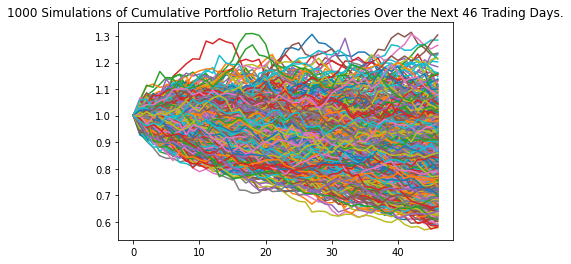

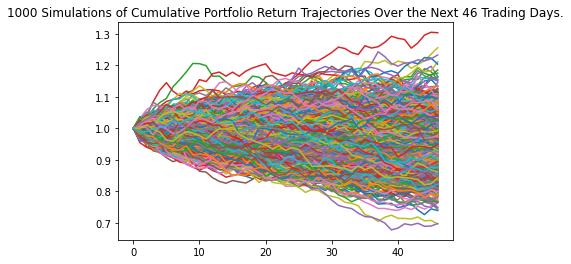

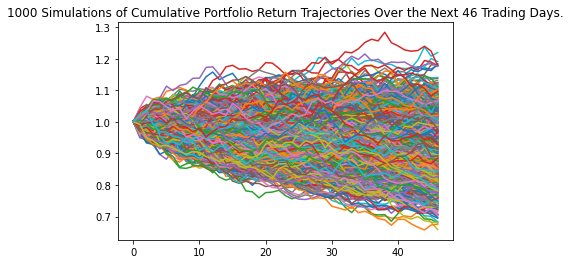

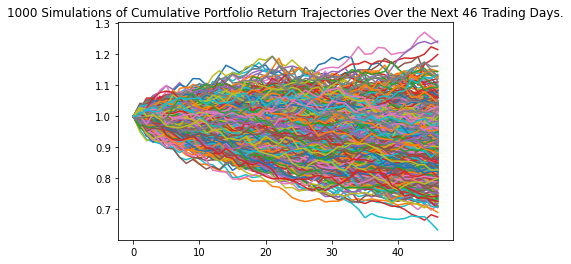

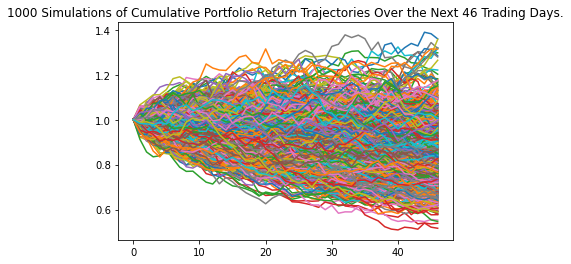

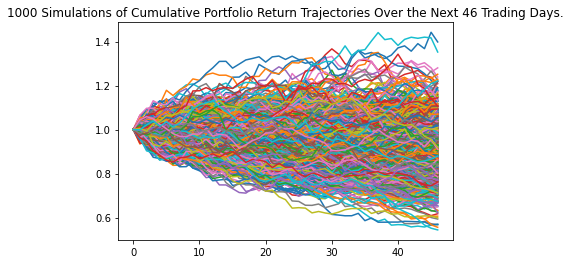

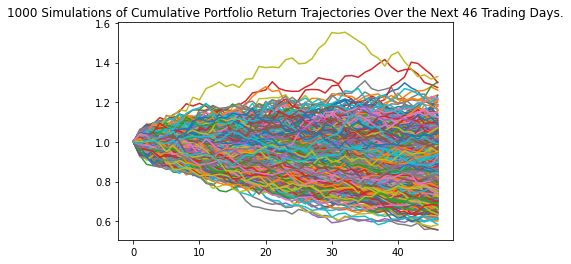

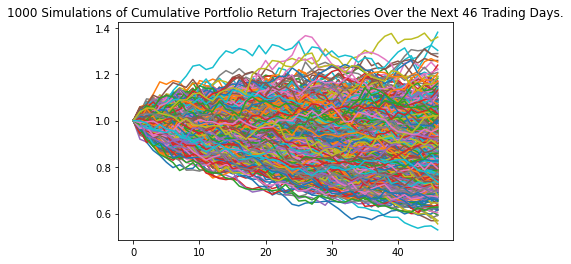

In [46]:
# Visualize the 1 yr Monte Carlo simulation by creating an overlay line plot

MC_dict = {"VOT": MC_vot, "IWS": MC_iws, "MGC": MC_mgc, "EWSC": MC_ewsc, "BTC with VOT": MC_btc_vot, "BTC with IWS": MC_btc_iws, "BTC with MGC": MC_btc_mgc, "BTC with EWSC": MC_btc_ewsc}

for ticker, MC_obj in MC_dict.items():
    print(f"Line plot for {ticker}:")
    line_plot = MC_obj.plot_simulation()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 
    
vot_distribution_plot = MC_vot.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

iws_distribution_plot = MC_iws.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

mgc_distribution_plot = MC_mgc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

ewsc_distribution_plot = MC_ewsc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_vot_distribution_plot = MC_btc_vot.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_iws_distribution_plot = MC_btc_iws.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_mgc_distribution_plot = MC_btc_mgc.plot_distribution()

In [ ]:
# Visualize the probability distribution of the Monte Carlo simulation 

btc_ewsc_distribution_plot = MC_btc_ewsc.plot_distribution()

# PART III: SUMMARIZE MONTE CARLO RESULTS

In [47]:
# Generate summary statistics from the Monte Carlo simulation results

tables = summary_tables(MC_dict)

tables_dict = {"vot_table": tables[0], "iws_table": tables[1], "mgc_table": tables[2], "ewsc_table": tables[3], "btc_vot_table": tables[4], "btc_iws_table": tables[5], "btc_mgc_table": tables[6], "btc_ewsc_table": tables[7]}

Cummulative returns summary for VOT:
count           1000.000000
mean               0.854140
std                0.123572
min                0.576816
25%                0.767564
50%                0.842901
75%                0.933038
max                1.304204
95% CI Lower       0.631331
95% CI Upper       1.120182
Name: 46, dtype: float64
Cummulative returns summary for IWS:
count           1000.000000
mean               0.946724
std                0.083243
min                0.696069
25%                0.890190
50%                0.943383
75%                0.999074
max                1.303301
95% CI Lower       0.790883
95% CI Upper       1.113753
Name: 46, dtype: float64
Cummulative returns summary for MGC:
count           1000.000000
mean               0.910865
std                0.094821
min                0.658742
25%                0.843956
50%                0.910726
75%                0.971575
max                1.219608
95% CI Lower       0.735982
95% CI Upper       1.102020

In [48]:
# Establish initial investment amount

investment = 100000

In [49]:
# Summarize portfolio predictions for 100% of respective ETF. This will serve as a baseline for comparison of BTC's interaction with ETF.

ticker_dict1 = {"VOT": tables_dict.get("vot_table"), "IWS": tables_dict.get("iws_table"), "MGC": tables_dict.get("mgc_table"), "EWSC": tables_dict.get("ewsc_table")} 

for ticker, table in ticker_dict1.items():
    summary1(table, investment, ticker)

There is a 95% chance that an initial investment of $100000 in a portfolio with 100% VOT over the next
nine weeks will end within the range of $63133.08 and $112018.17.

The average expected return for VOT in nine weeks is $85414.03.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 100% IWS over the next
nine weeks will end within the range of $79088.26 and $111375.3.

The average expected return for IWS in nine weeks is $94672.42.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 100% MGC over the next
nine weeks will end within the range of $73598.16 and $110201.98.

The average expected return for MGC in nine weeks is $91086.47.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 100% EWSC over the next
nine weeks will end within the range of $73349.66 and $109158.7.

The average expected return for EWSC in nine weeks is $90063.78.
-----


In [50]:
# Summarize 50/50 portfolio predictions.
    
ticker_dict2 = {"VOT": tables_dict.get("btc_vot_table"), "IWS": tables_dict.get("btc_iws_table"), "MGC": tables_dict.get("btc_mgc_table"), "EWSC": tables_dict.get("btc_ewsc_table")} 

bitcoin = "BTC"

for ticker, table in ticker_dict2.items():
    summary2(table, investment, ticker, bitcoin) 

There is a 95% chance that an initial investment of $100000 in a portfolio with 50% VOT and 50% BTC
over the next nine weeks will end within the range of $61801.29 and $114445.88.

The average expected return for VOT with BTC in nine weeks is $84949.63.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 50% IWS and 50% BTC
over the next nine weeks will end within the range of $67452.34 and $115039.05.

The average expected return for IWS with BTC in nine weeks is $89399.03.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 50% MGC and 50% BTC
over the next nine weeks will end within the range of $65770.54 and $113343.99.

The average expected return for MGC with BTC in nine weeks is $87058.26.
-----
There is a 95% chance that an initial investment of $100000 in a portfolio with 50% EWSC and 50% BTC
over the next nine weeks will end within the range of $65546.87 and $115905.79.

The average expected return for EWSC w